In [2]:
#!/usr/bin/env python

from __future__ import unicode_literals

import argparse
import collections
import io
import re

split_pattern = re.compile(r'([.,!?"\':;)(])')
digit_pattern = re.compile(r'\d')

'''
input)  My name is "ttakano        "  and I was born in 1994
output) ["my", "name", "is", """, "ttakano", """, "and", "i", "was", "born", "in", "0000"
'''
def split_sentence(s, use_lower):
    if use_lower:
        s = s.lower()
    s = s.replace('\u2019', "'")        #      ’→'
    s = digit_pattern.sub('0', s)        #[0-9] → "0"
    words = []
    for word in s.strip().split():
        words.extend(split_pattern.split(word))         # if word="(ttakano)"  words=["(", "ttakano", ")"]
    words = [w for w in words if w]
    return words




In [3]:
def count_lines(path):
    with io.open(path, encoding='utf-8', errors='ignore') as f:
        return sum([1 for _ in f])

In [4]:
def read_file(path, use_lower):
    n_lines = count_lines(path)
    with io.open(path, encoding='utf-8', errors='ignore') as f:
        for line in f:
            words = split_sentence(line, use_lower)
            yield words


In [5]:
def proc_dataset(
        path, outpath, vocab_path=None, vocab_size=None, use_lower=True):
    token_count = 0
    counts = collections.Counter()
    with io.open(outpath, 'w', encoding='utf-8') as f:
        for words in read_file(path, use_lower):
            line = ' '.join(words)
            f.write(line)
            f.write('\n')
            if vocab_path:
                for word in words:
                    counts[word] += 1
            token_count += len(words)
    print('number of tokens: %d' % token_count)

    if vocab_path and vocab_size:
        vocab = [word for (word, _) in counts.most_common(vocab_size)]
        with io.open(vocab_path, 'w', encoding='utf-8') as f:
            for word in vocab:
                f.write(word)
                f.write('\n')

    return counts


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_graph(counts):
    list_word=counts.most_common(40000)
    counts = list(zip(*list_word))[1]
    plt.hist(
        counts,
        bins=100,
        range=(1, 100))

    plt.xlim(xmin=1, xmax=100)
    plt.ylim(ymin=1, ymax=5000)
    plt.grid(axis='y')
    plt.show()


In [62]:
INPUT="../dataset/ncKyotoAll.en"
OUTPUT="./dataset/pncKyotoAll.en"
vocab_file="./dataset/vocab.en"
couts = proc_dataset(
    INPUT, OUTPUT, vocab_path=vocab_file,
    vocab_size=40000, use_lower=True)

number of tokens: 11767864


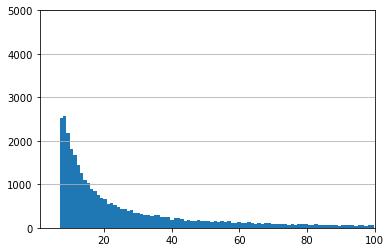

In [71]:
show_graph(couts)

In [78]:
for word, count in couts.most_common(100):
    print("{0},{1}".format(word,count))

the,739268
,,606256
of,430660
.,387446
and,288272
in,261908
(,256216
),255774
to,213518
a,201339
was,172344
',161437
is,103372
as,102543
",95537
he,81737
0000,78747
that,71889
by,68942
it,66046
no,64995
on,64300
for,63877
his,58048
with,55667
from,52436
s,46137
at,43403
00,43068
were,42851
which,39486
who,36015
this,32886
an,32704
period,32176
are,31943
or,30359
:,29704
emperor,29117
family,28397
temple,28100
be,26769
after,26303
0,26091
also,25963
000,25376
kyoto,24698
but,24567
had,24489
imperial,24418
clan,23029
not,22956
there,21279
japan,20882
province,20735
japanese,20413
when,19903
city,19858
called,19856
one,19490
became,18713
name,17627
such,16926
station,16683
;,16430
however,16324
they,16079
been,16017
prefecture,15691
used,15675
have,15176
during,14910
time,14048
-,13745
other,13541
their,13512
first,13491
court,13358
shrine,12956
rank,12917
government,12893
into,12529
son,12346
made,12151
its,11920
people,11914
because,11802
school,11796
has,11756
line,11704
year,11620
edo

In [58]:
import json

f = open("./result/100_500/log", 'r')
json_data = json.load(f) #JSON形式で読み込む
loss = []
perp = []
bleu = []
for j in json_data:
    if 'validation/main/bleu' in j:
        bleu.append(j['validation/main/bleu'])
    loss.append(j['main/loss'])
    perp.append(j['main/perp'])

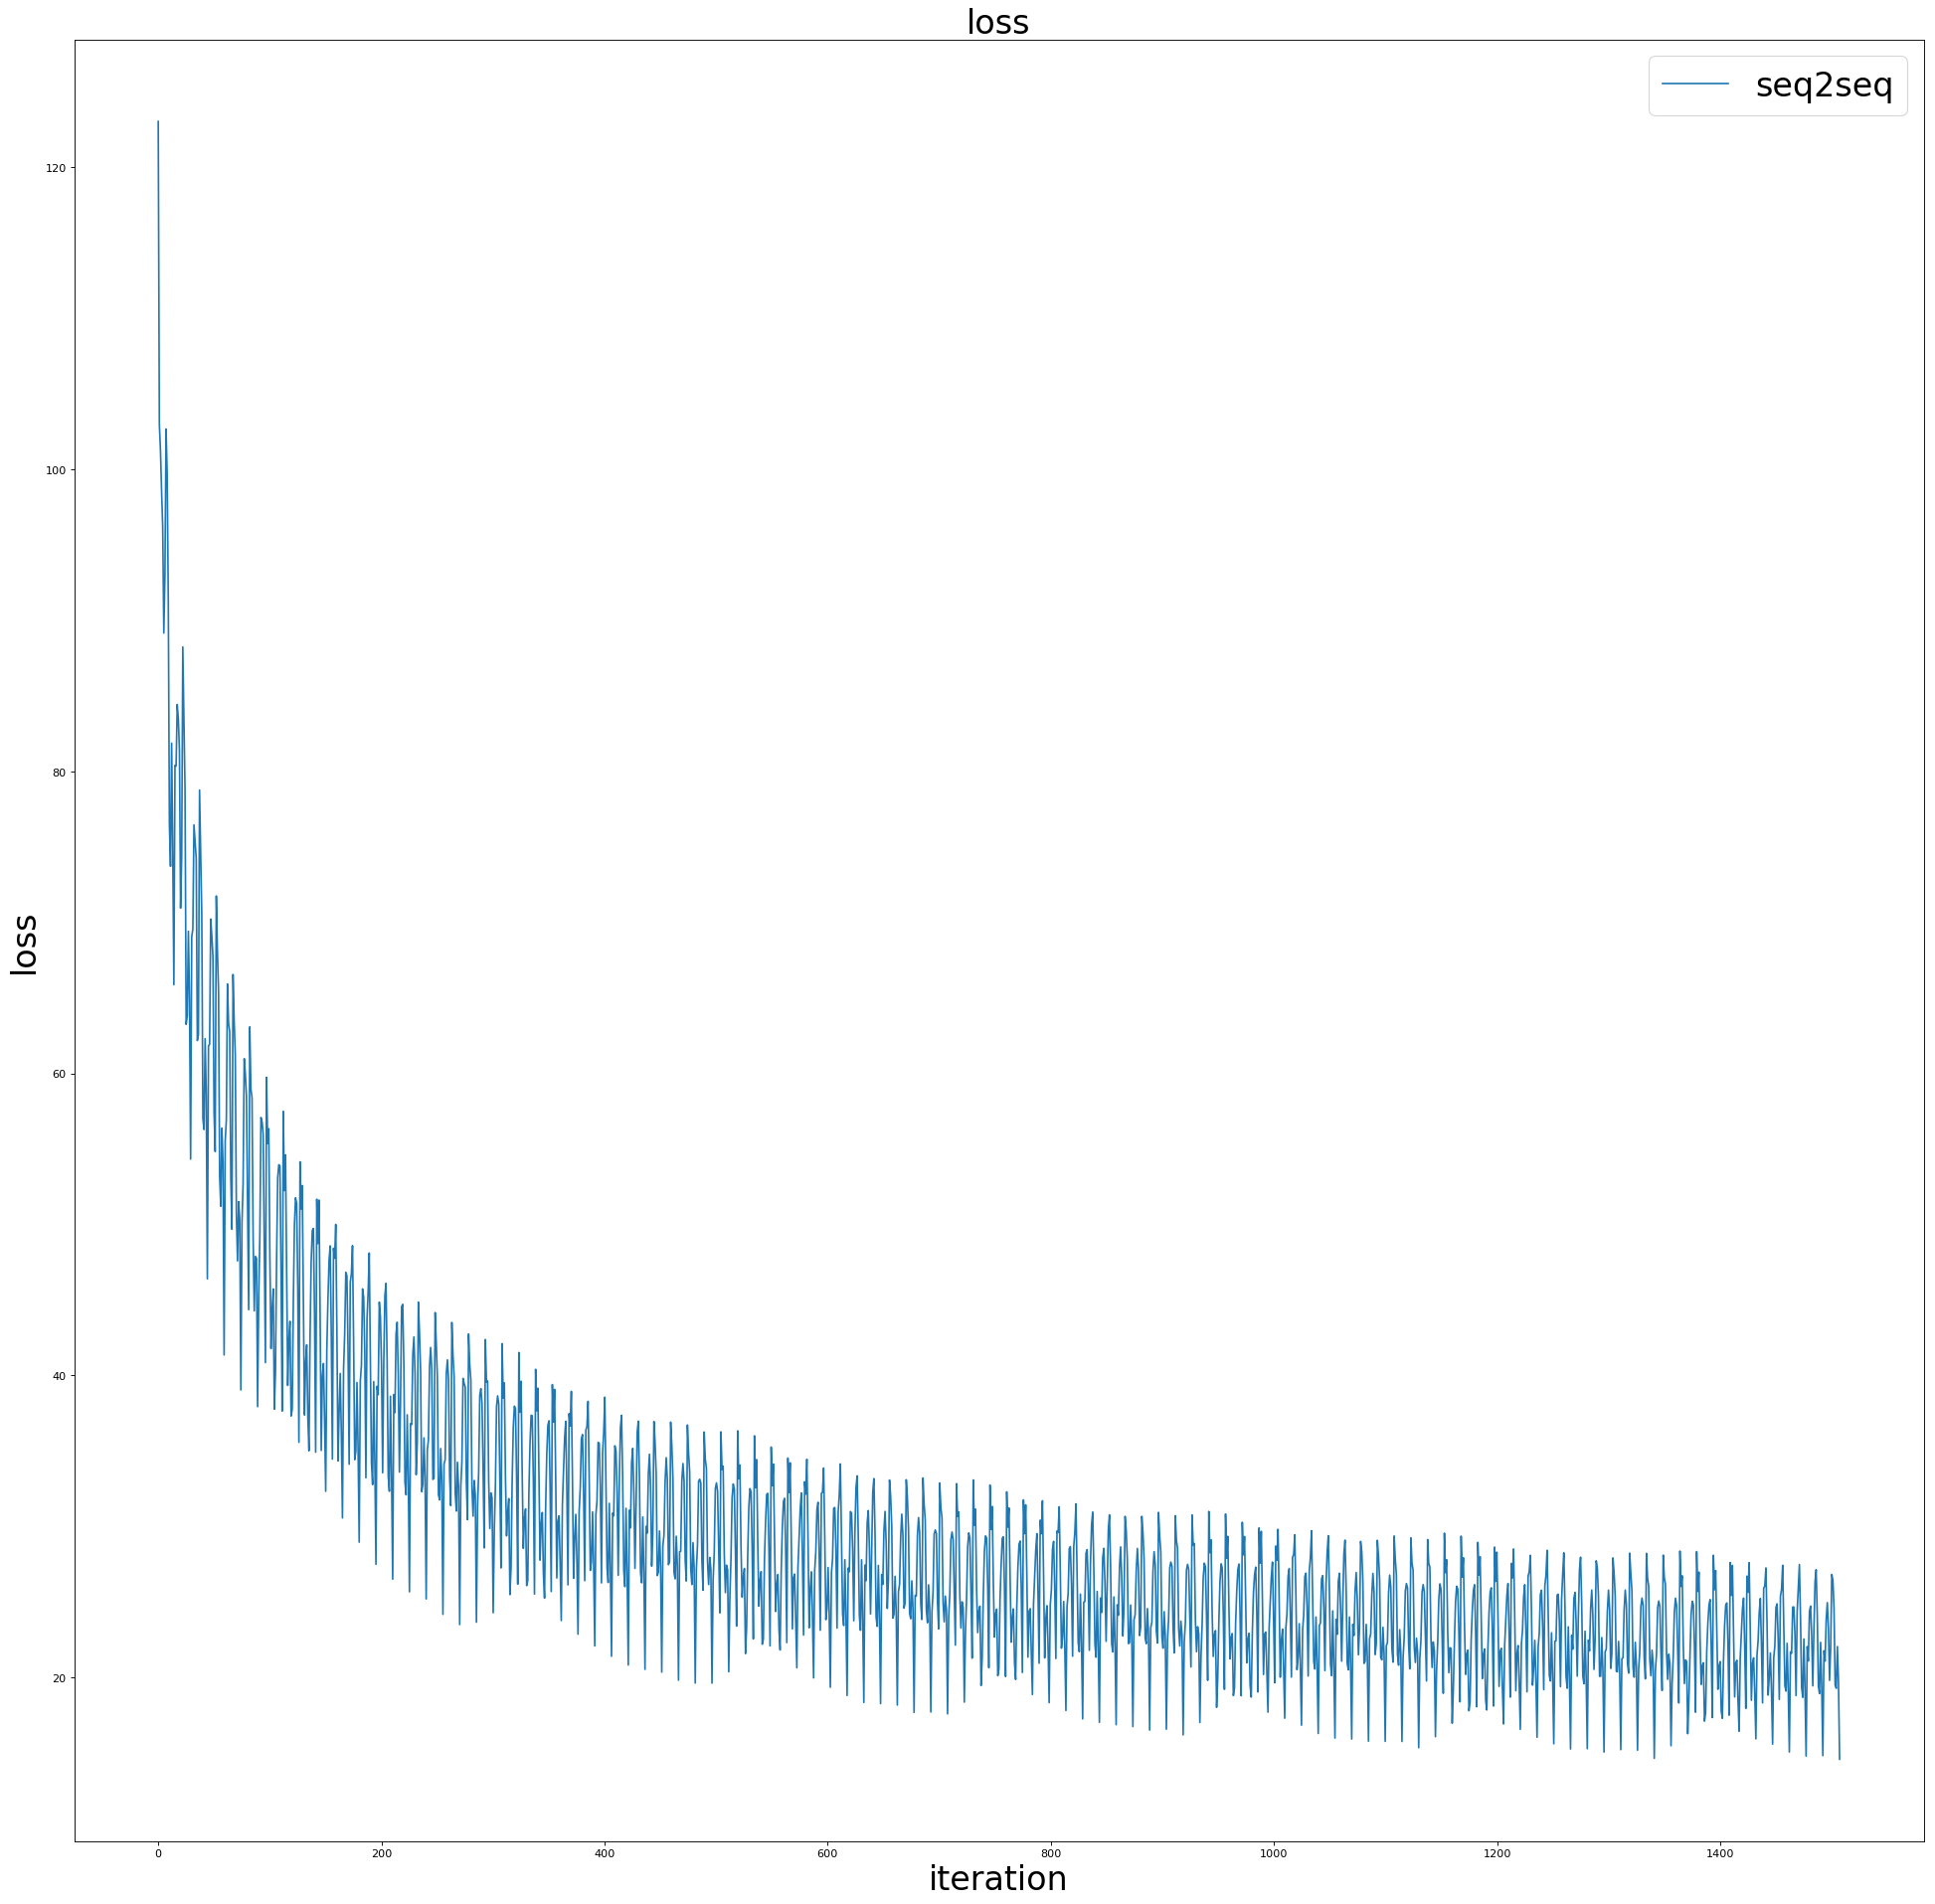

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,30),dpi=80)
plt.title("loss", fontsize="30")
plt.xlabel("iteration", fontsize="30")
plt.ylabel("loss", fontsize="30")
x = np.linspace(0, len(loss), len(loss))
pyplot.plot(x, loss, label='seq2seq')
plt.legend(loc='upper right', fontsize="30")


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd88dade668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fd88d0a5630>], dtype=object)

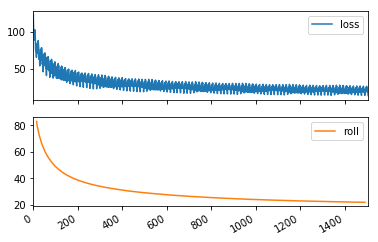

In [110]:
# roll loss 
%matplotlib inline
import pandas as pd
df = pd.DataFrame({'loss': loss})
roll = df.rolling(30, center=True).mean()
df_s['loss'] = df.sort_values('loss')
df['roll'] = roll
df.plot(subplots=True)

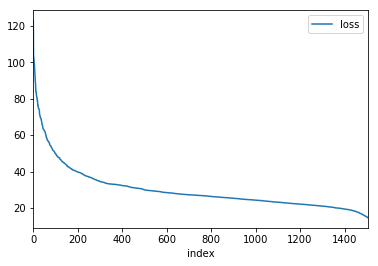

In [116]:
# sort loss
%matplotlib inline
import pandas as pd
df = pd.DataFrame({'loss': loss})
df_s = df.sort_values('loss', ascending=False)
df_s['index'] = [i for i in range(1507)]
df_s.plot(x='index', y='loss')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd88af7d6a0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fd88b120a20>], dtype=object)

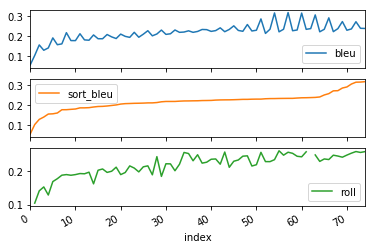

In [143]:
#sort bleu
%matplotlib inline
import pandas as pd
df = pd.DataFrame({'sort_bleu': bleu})
df_s = df.sort_values('sort_bleu')
roll = df.rolling(3, center=True).mean()
df_s['index'] = [i for i in range(75)]
df_s['bleu'] = bleu
df_s['roll'] = roll
df_s.plot(x='index', y=['bleu', 'sort_bleu', 'roll'], subplots=True)
